In [94]:
#start with the usual imports
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
from rdkit import DataStructs
import time
from rdkit import rdBase
print(time.asctime())
print(rdBase.rdkitVersion)

Fri Feb  1 14:47:27 2019
2018.09.1


In [2]:
#D
hbd = '[$([N;!H0;v3,v4&+1]),$([O,S;H1;+0]),n&H1&+0]'

#A
hba = '[$([O,S;H1;v2;!$(*-*=[O,N,P,S])]),$([O,S;H0;v2]),$([O,S;-]),$([N;v3;!$(N-*=[O,N,P,S])]),n&H0&+0,$([o,s;+0;!$([o,s]:n);!$([o,s]:c:n)])]'

#Ar
aromatic = '[a]'

#H
halogen = '[F,Cl,Br,I]'

#B
basic ='[#7;+,$([N;H2&+0][$([C,a]);!$([C,a](=O))]),$([N;H1&+0]([$([C,a]);!$([C,a](=O))])[$([C,a]);!$([C,a](=O))]),$([N;H0&+0]([C;!$(C(=O))])([C;!$(C(=O))])[C;!$(C(=O))])]'

#Ac
acidic = '[$([C,S](=[O,S,P])-[O;H1,-1])]'

In [136]:
atomTypes = ['D', 'A', 'Ar', 'H', 'B', 'Ac']
def getInvariants(mol):
    invariants = [""]*mol.GetNumAtoms()
    for label, pphore in zip(atomTypes, [hbd, hba, aromatic, halogen, basic, acidic]):
        atoms = [i[0] for i in mol.GetSubstructMatches(Chem.MolFromSmarts(pphore))]
        for atom in atoms:
            #print(invariants[atom])
            invariants[atom] = invariants[atom]+("," if invariants[atom]!="" else "")+label
    return invariants

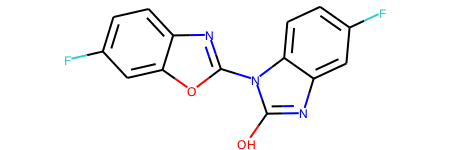

In [137]:
someDrug = 'Oc1nc2cc(F)ccc2n1-c1nc2ccc(F)cc2o1'
mol = Chem.MolFromSmiles(someDrug); mol

In [138]:
invariants = getInvariants(mol); invariants

['D,A',
 'Ar',
 'A,Ar',
 'Ar',
 'Ar',
 'Ar',
 'H',
 'Ar',
 'Ar',
 'Ar',
 'A,Ar',
 'Ar',
 'A,Ar',
 'Ar',
 'Ar',
 'Ar',
 'Ar',
 'H',
 'Ar',
 'Ar',
 'Ar']

In [139]:
#Shoutout to @iwatobipen!
def mol_with_atom_index( mol, invariants ):
    atoms = mol.GetNumAtoms()
    for label, idx in zip(invariants, range( atoms )):
        #print(label)
        mol.GetAtomWithIdx( idx ).SetProp('molAtomMapNumber', str( label ) )
    return mol

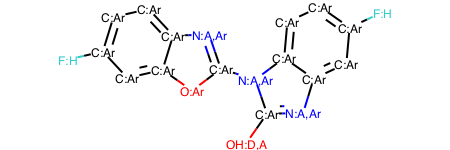

In [135]:
mol_with_atom_index(mol, invariants)

# Also can do this:
but testing on lots of molecules shows it returns more than 6 atom types

In [142]:
##This list can be given as an argument to GetMorganFingerprint(mol, 2, invariants=[])
Chem.rdMolDescriptors.GetFeatureInvariants(mol)

[3, 4, 6, 4, 4, 4, 8, 4, 4, 4, 6, 4, 6, 4, 4, 4, 4, 8, 4, 4, 4]